This Jupyter Notebook executes neural network training via Inc/train_neural.py and includes various visualizations.

In [1]:
root_directory = '/Users/vojtechremis/Desktop/bachelorproject/'

In [2]:
import numpy as np

# Custom class
from inc import train_neural
import sys
sys.path.append(root_directory+'Inc')
from FolderManagement import createDirectory
from include import loadRectangles
from plot import approximationVizualization
import log

# Setup parameters

In [3]:
experiment_name = 'thesis' # Name of experiment

training_data_path = f'{root_directory}2_GeneratingIntervals/Output/thesis/Combinations/samples=1000_intervals=0.05,0.25/Combinations_Dataset__trhd_>=_5.csv'
experiment_root_folder = f'{root_directory}3_Train/{experiment_name}'
createDirectory(experiment_root_folder) # Creates parent folder for outputs

subexperiment_name = 'Intervals=(0.05, 0.25)_Samples=1000_test'
setup_file_path = f'{experiment_root_folder}/{subexperiment_name}'
createDirectory(setup_file_path)

Log = log.log(pathToExternalFile=f'{experiment_root_folder}/log_neural.txt')

# Setting hyperparameters
args = {
  'scaler': 'standardscaler',
  'test_size': 0.3,
  'epochs': 500,
  'batch_size': 50,
  'dense_units': [64, 64],
  'learning_rate': 1e-2,
  'learning_rate_final': 1e-4,
  'EarlyStopping_patience': 20,
  'EarlyStopping_minDelta': 1e-6
}

# Initialize network

In [4]:
Log.info(f'Training experiment: {experiment_name}')

nn = train_neural.NeuralNetwork(inputDim=4, outputDim=1, logRoot=setup_file_path)
nn.loadData(pathToCombinations=training_data_path)
nn.setHyperParameters(args)

# Load and setup metrics (custom manually imported rectangles)
Metrics = [
    {'filePath': f'{root_directory}3_Train/ValidationRectangles_Sampling/rectanglesValidation_small.txt', 'metricName': 'Small_rectangles'},
    {'filePath': f'{root_directory}3_Train/ValidationRectangles_Sampling/rectanglesValidation_mid.txt', 'metricName': 'Mid_rectangles'},
    {'filePath': f'{root_directory}3_Train/ValidationRectangles_Sampling/rectanglesOutput_huge.txt', 'metricName': 'Huge_rectangles'}
]

for metric in Metrics:
    X_evaluate, Y_evaluate = loadRectangles(metric['filePath'])
    metricName = metric['metricName']
    nn.setCustomMetric_callback(X_evaluate, Y_evaluate, metricName)

20:17:52	Training experiment: thesis
20:17:52	Folder has been created [/Users/vojtechremis/Desktop/bachelorproject/3_Train/thesis/Intervals=(0.05, 0.25)_Samples=1000_test/train_neural.py-2024-07-19_201752-Em=1e-06,Ep=20,bs=50,du=[64, 64],e=500,lr=0.01,lrf=0.0001,s=standardscaler,ts=0.3/Plots].
20:17:52	Folder has been created [/Users/vojtechremis/Desktop/bachelorproject/3_Train/thesis/Intervals=(0.05, 0.25)_Samples=1000_test/train_neural.py-2024-07-19_201752-Em=1e-06,Ep=20,bs=50,du=[64, 64],e=500,lr=0.01,lrf=0.0001,s=standardscaler,ts=0.3/Datasets].
20:17:52	Folder has been created [/Users/vojtechremis/Desktop/bachelorproject/3_Train/thesis/Intervals=(0.05, 0.25)_Samples=1000_test/train_neural.py-2024-07-19_201752-Em=1e-06,Ep=20,bs=50,du=[64, 64],e=500,lr=0.01,lrf=0.0001,s=standardscaler,ts=0.3/Keras].
20:17:52	Folder has been created [/Users/vojtechremis/Desktop/bachelorproject/3_Train/thesis/Intervals=(0.05, 0.25)_Samples=1000_test/train_neural.py-2024-07-19_201752-Em=1e-06,Ep=20,bs=

# Train!

(1000, 4) (1000, 1)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4545 (17.75 KB)
Trainable params: 4545 (17.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
 1/14 [=>............................] - ETA: 2s - loss: 1.3401WARNING:tensorflow:Callback method `on_train_batch_end` is slow 

14/14 [==============================] - 0s 15ms/step - loss: 0.5145 - val_loss: 0.0585
Epoch 2/500
14/14 [==============================] - 0s 9ms/step - loss: 0.0741 - val_loss: 0.0196
Epoch 3/500
14/14 [==============================] - 0s 8ms/step - loss: 0.0214 - val_loss: 0.0145
Epoch 4/500
14/14 [==============================] - 0s 10ms/step - loss: 0.0082 - val_loss: 0.0062
Epoch 5/500
14/14 [==============================] - 0s 8ms/step - loss: 0.0053 - val_loss: 0.0039
Epoch 6/500
14/14 [==============================] - 0s 8ms/step - loss: 0.0041 - val_loss: 0.0036
Epoch 7/500
14/14 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 8/500
14/14 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 9/500
14/14 [==============================] - 0s 7ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 10/500
14/14 [==============================] - 0s 7ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 11/500
14/14 

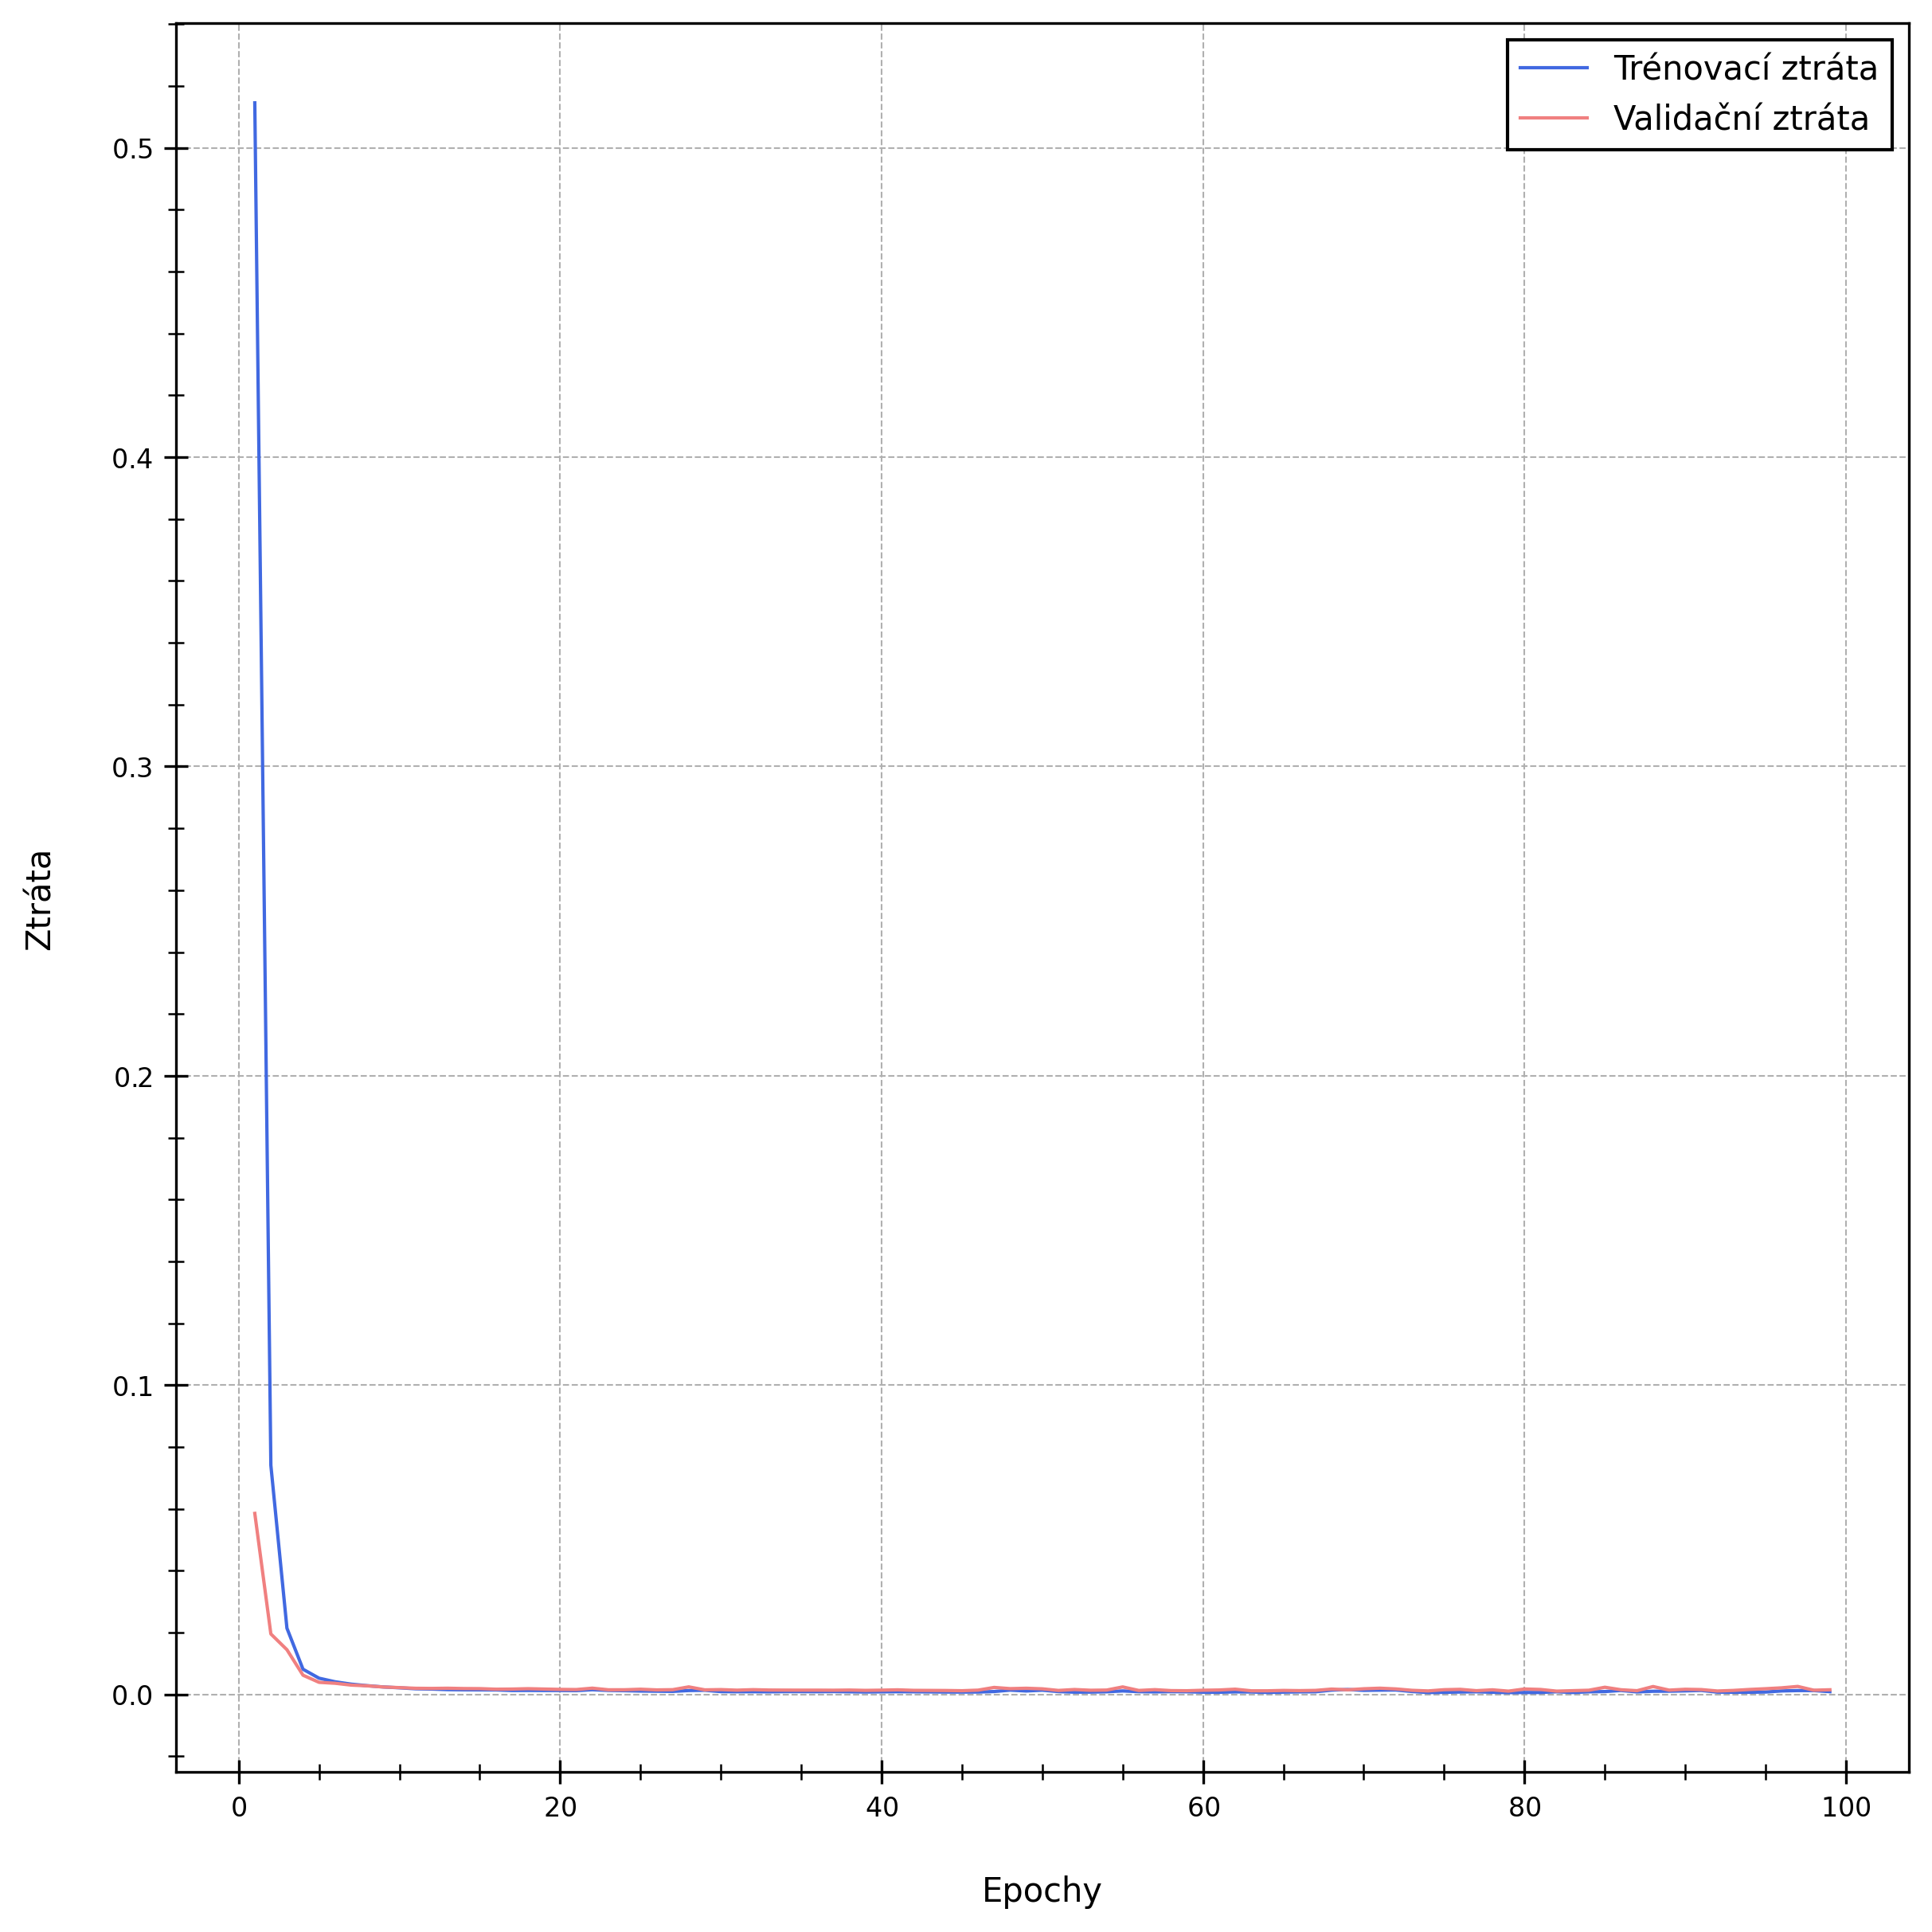

4/4 [==============================] - 0s 680us/step


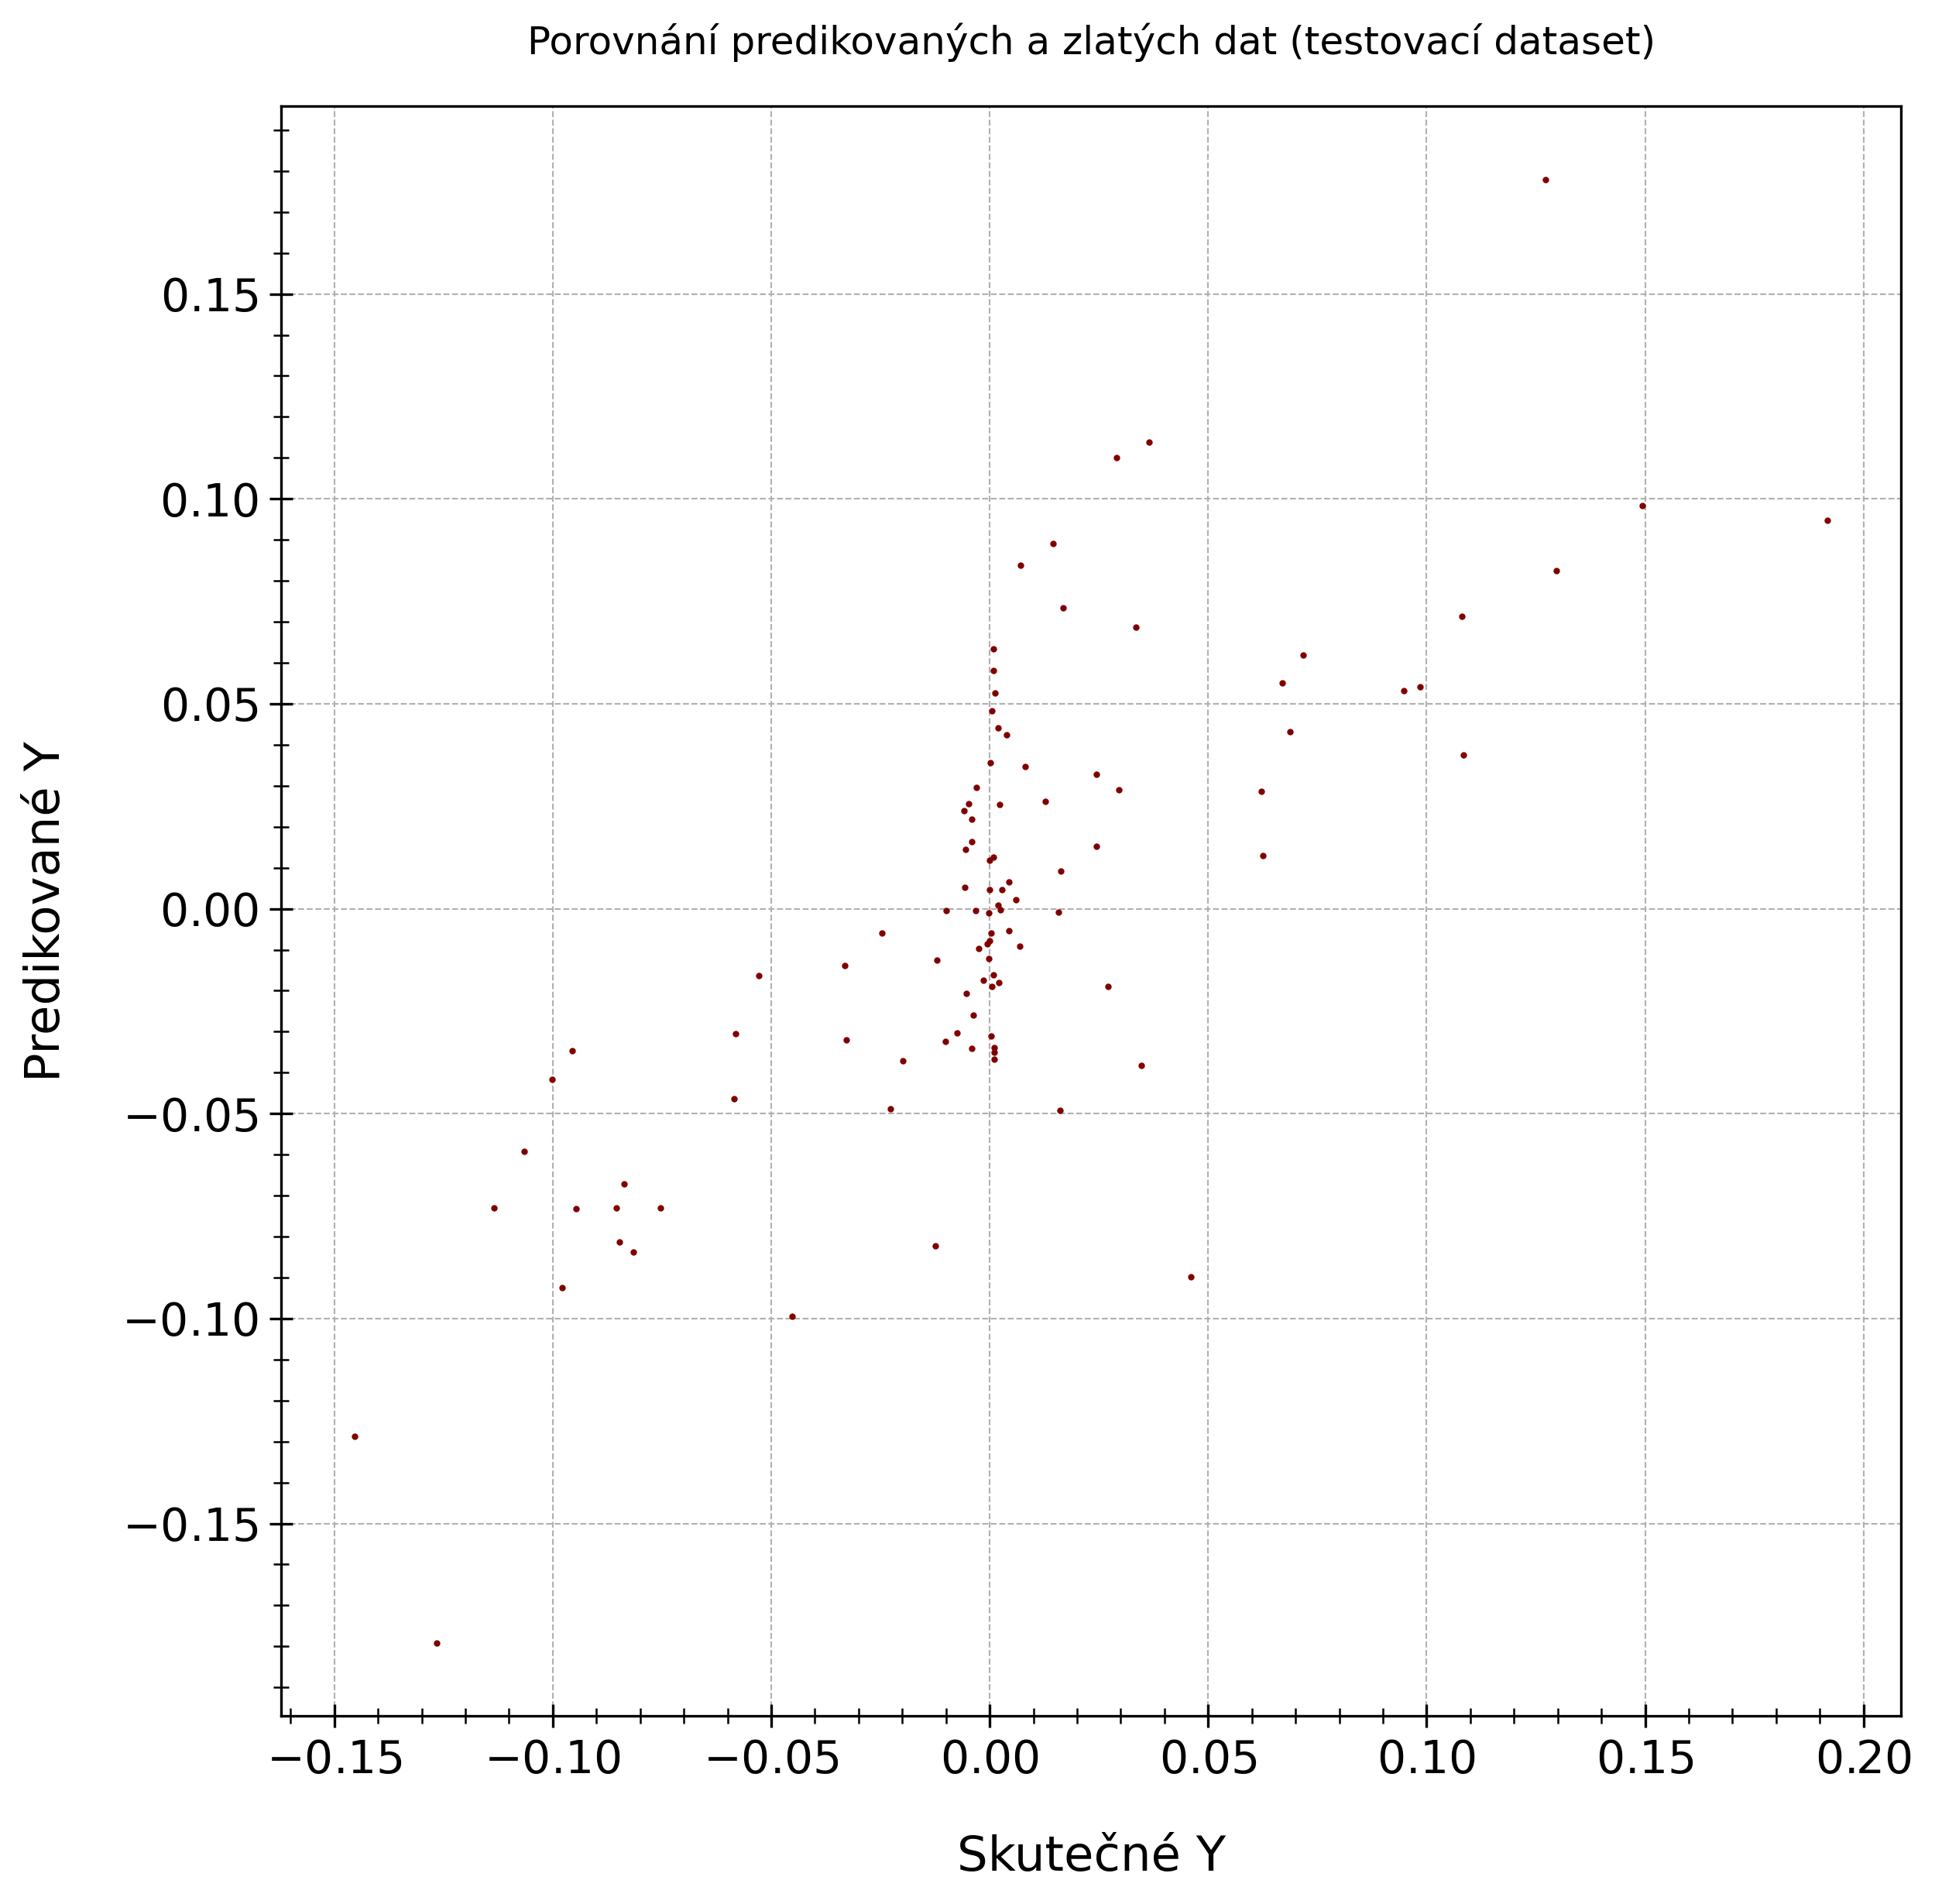

4/4 [==============================] - 0s 578us/step


<Figure size 1920x1440 with 0 Axes>

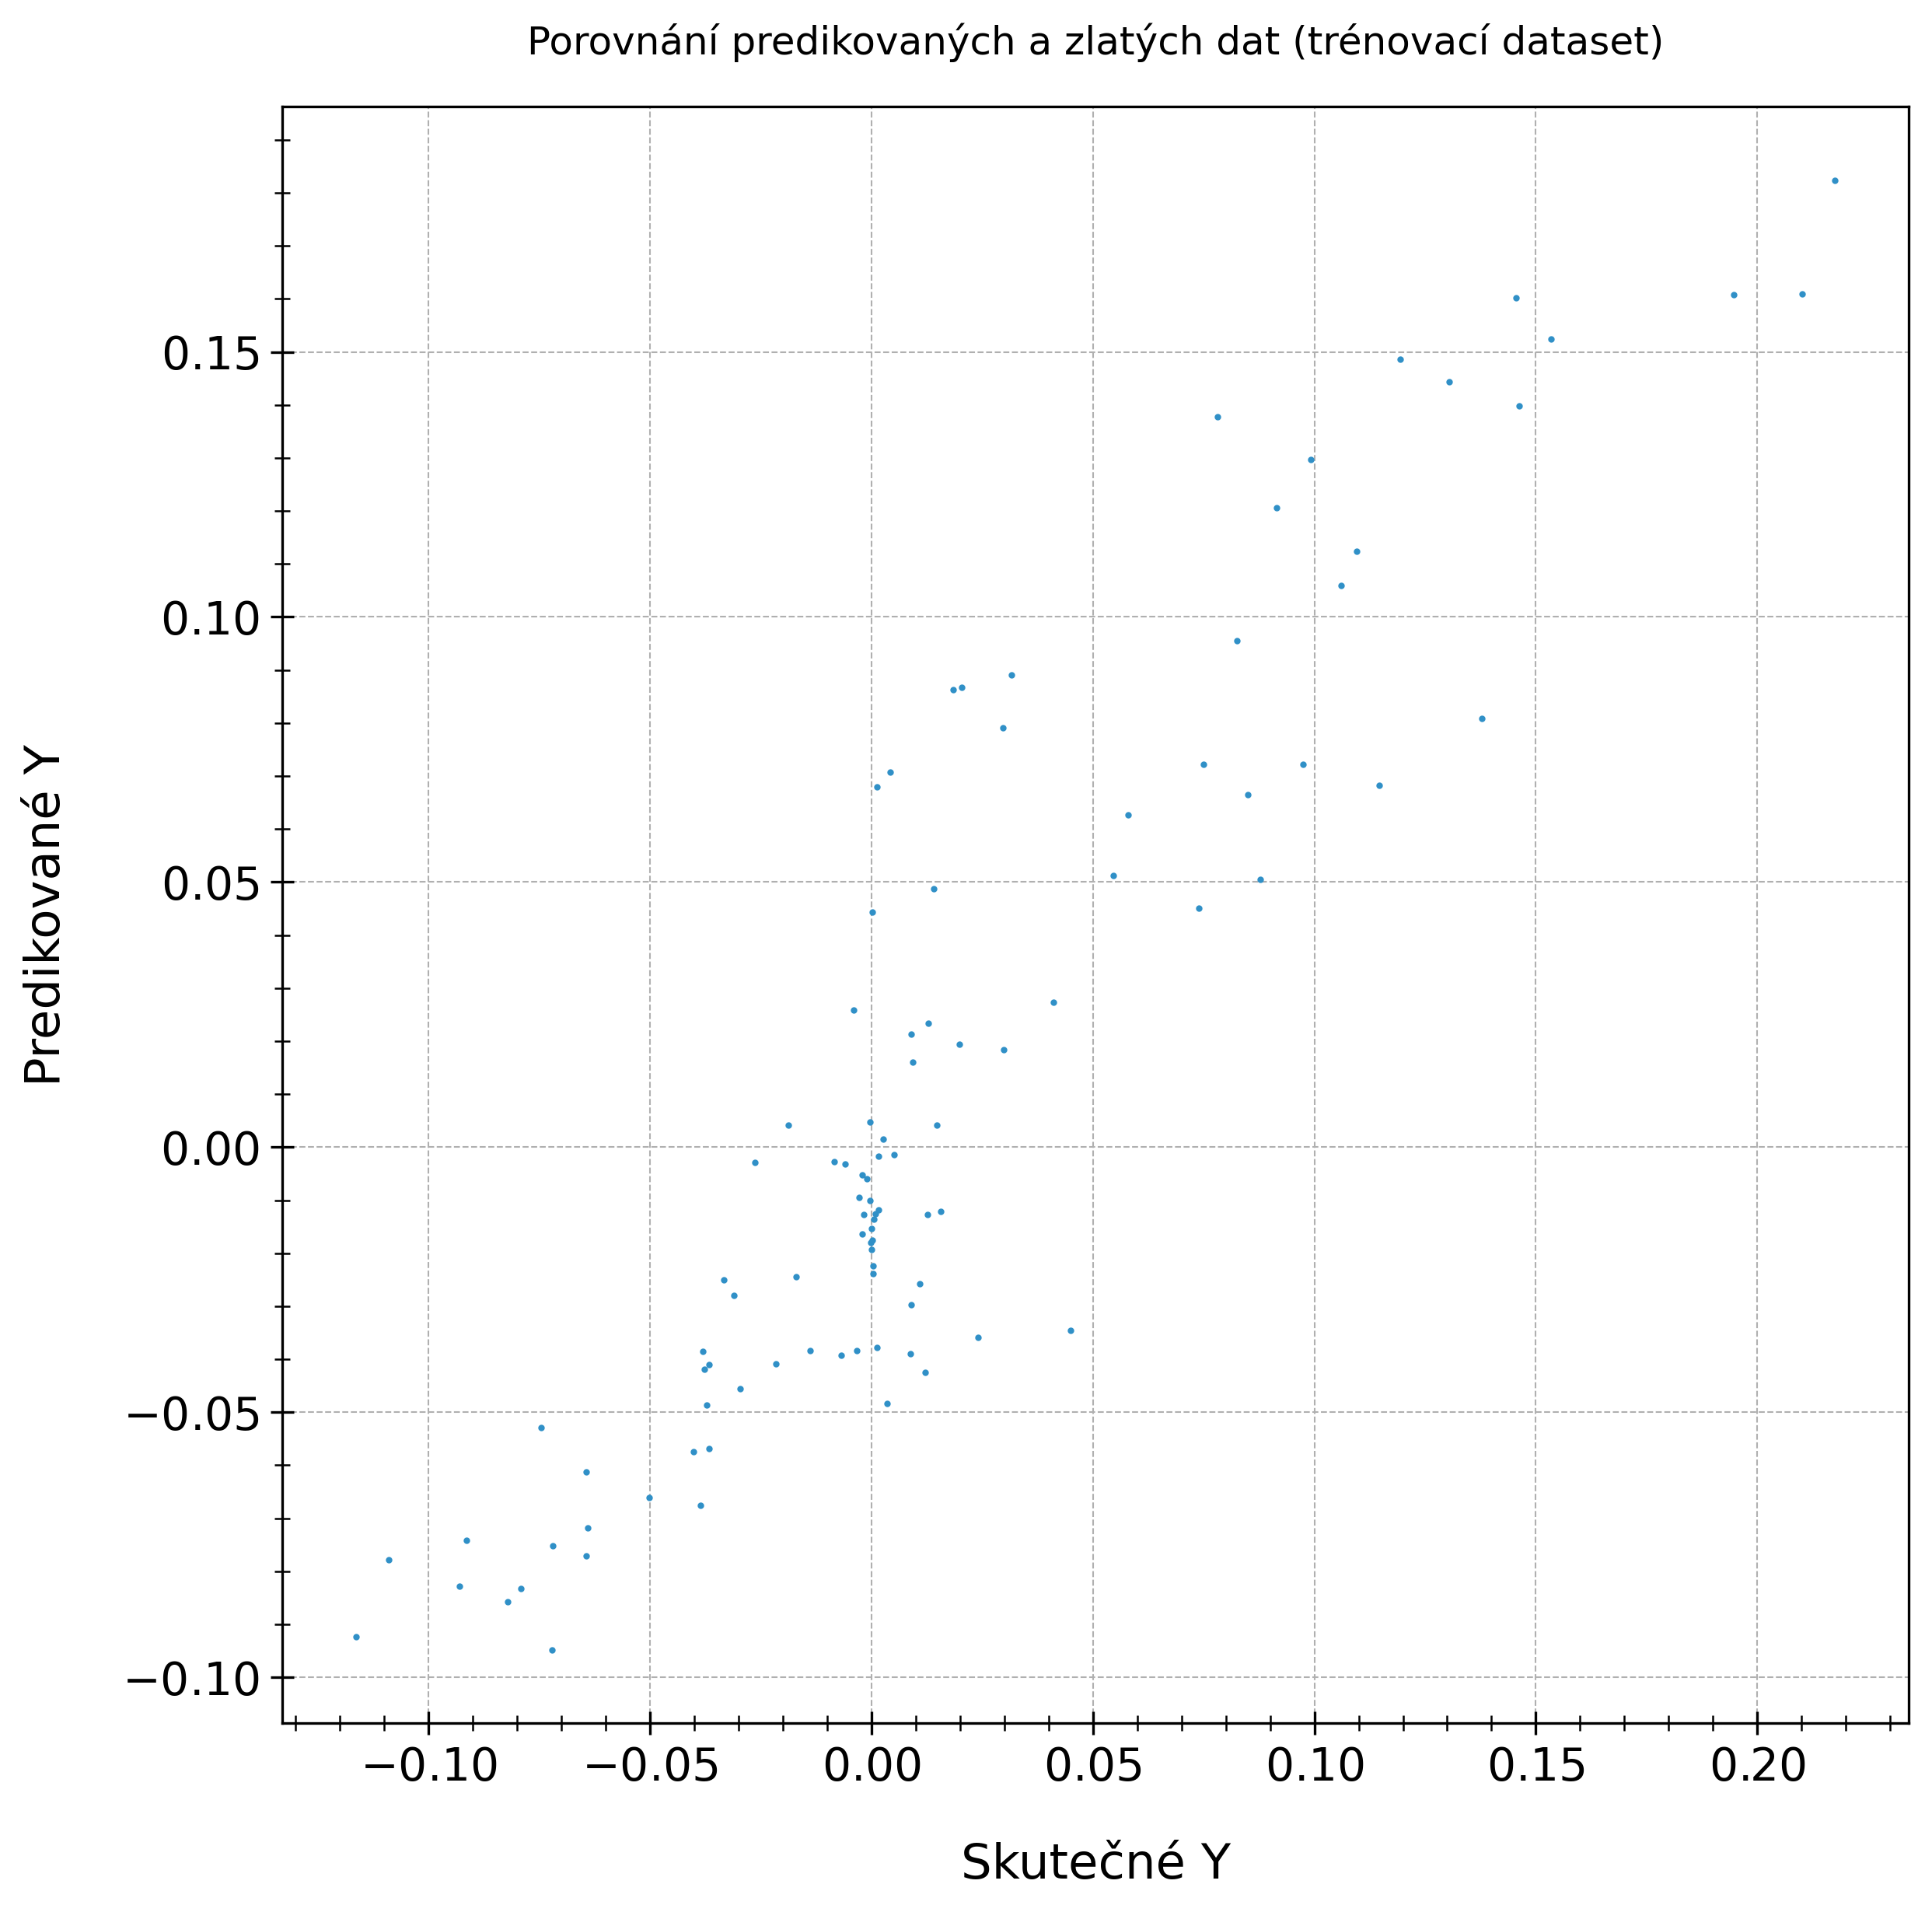

/Users/vojtechremis/Desktop/AMBEAT/Projects/AmbeatVenv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [5]:
nn.trainModel()

# Plot results

In [12]:
print('Plots are saved to:',  nn.plotsDir)
# Parameters
normMinMaxColor_list = [-0.24347023339288767, 0.2987879885373313] # Color scale (important for visual comparison)
xlim = [-500, 500]
ylim = [-500, 500]

Plots are saved to: /Users/vojtechremis/Desktop/bachelorproject/3_Train/thesis/Intervals=(0.05, 0.25)_Samples=1000_test/train_neural.py-2024-07-19_201752-Em=1e-06,Ep=20,bs=50,du=[64, 64],e=500,lr=0.01,lrf=0.0001,s=standardscaler,ts=0.3/Plots


1/1 [==============================] - 0s 8ms/step


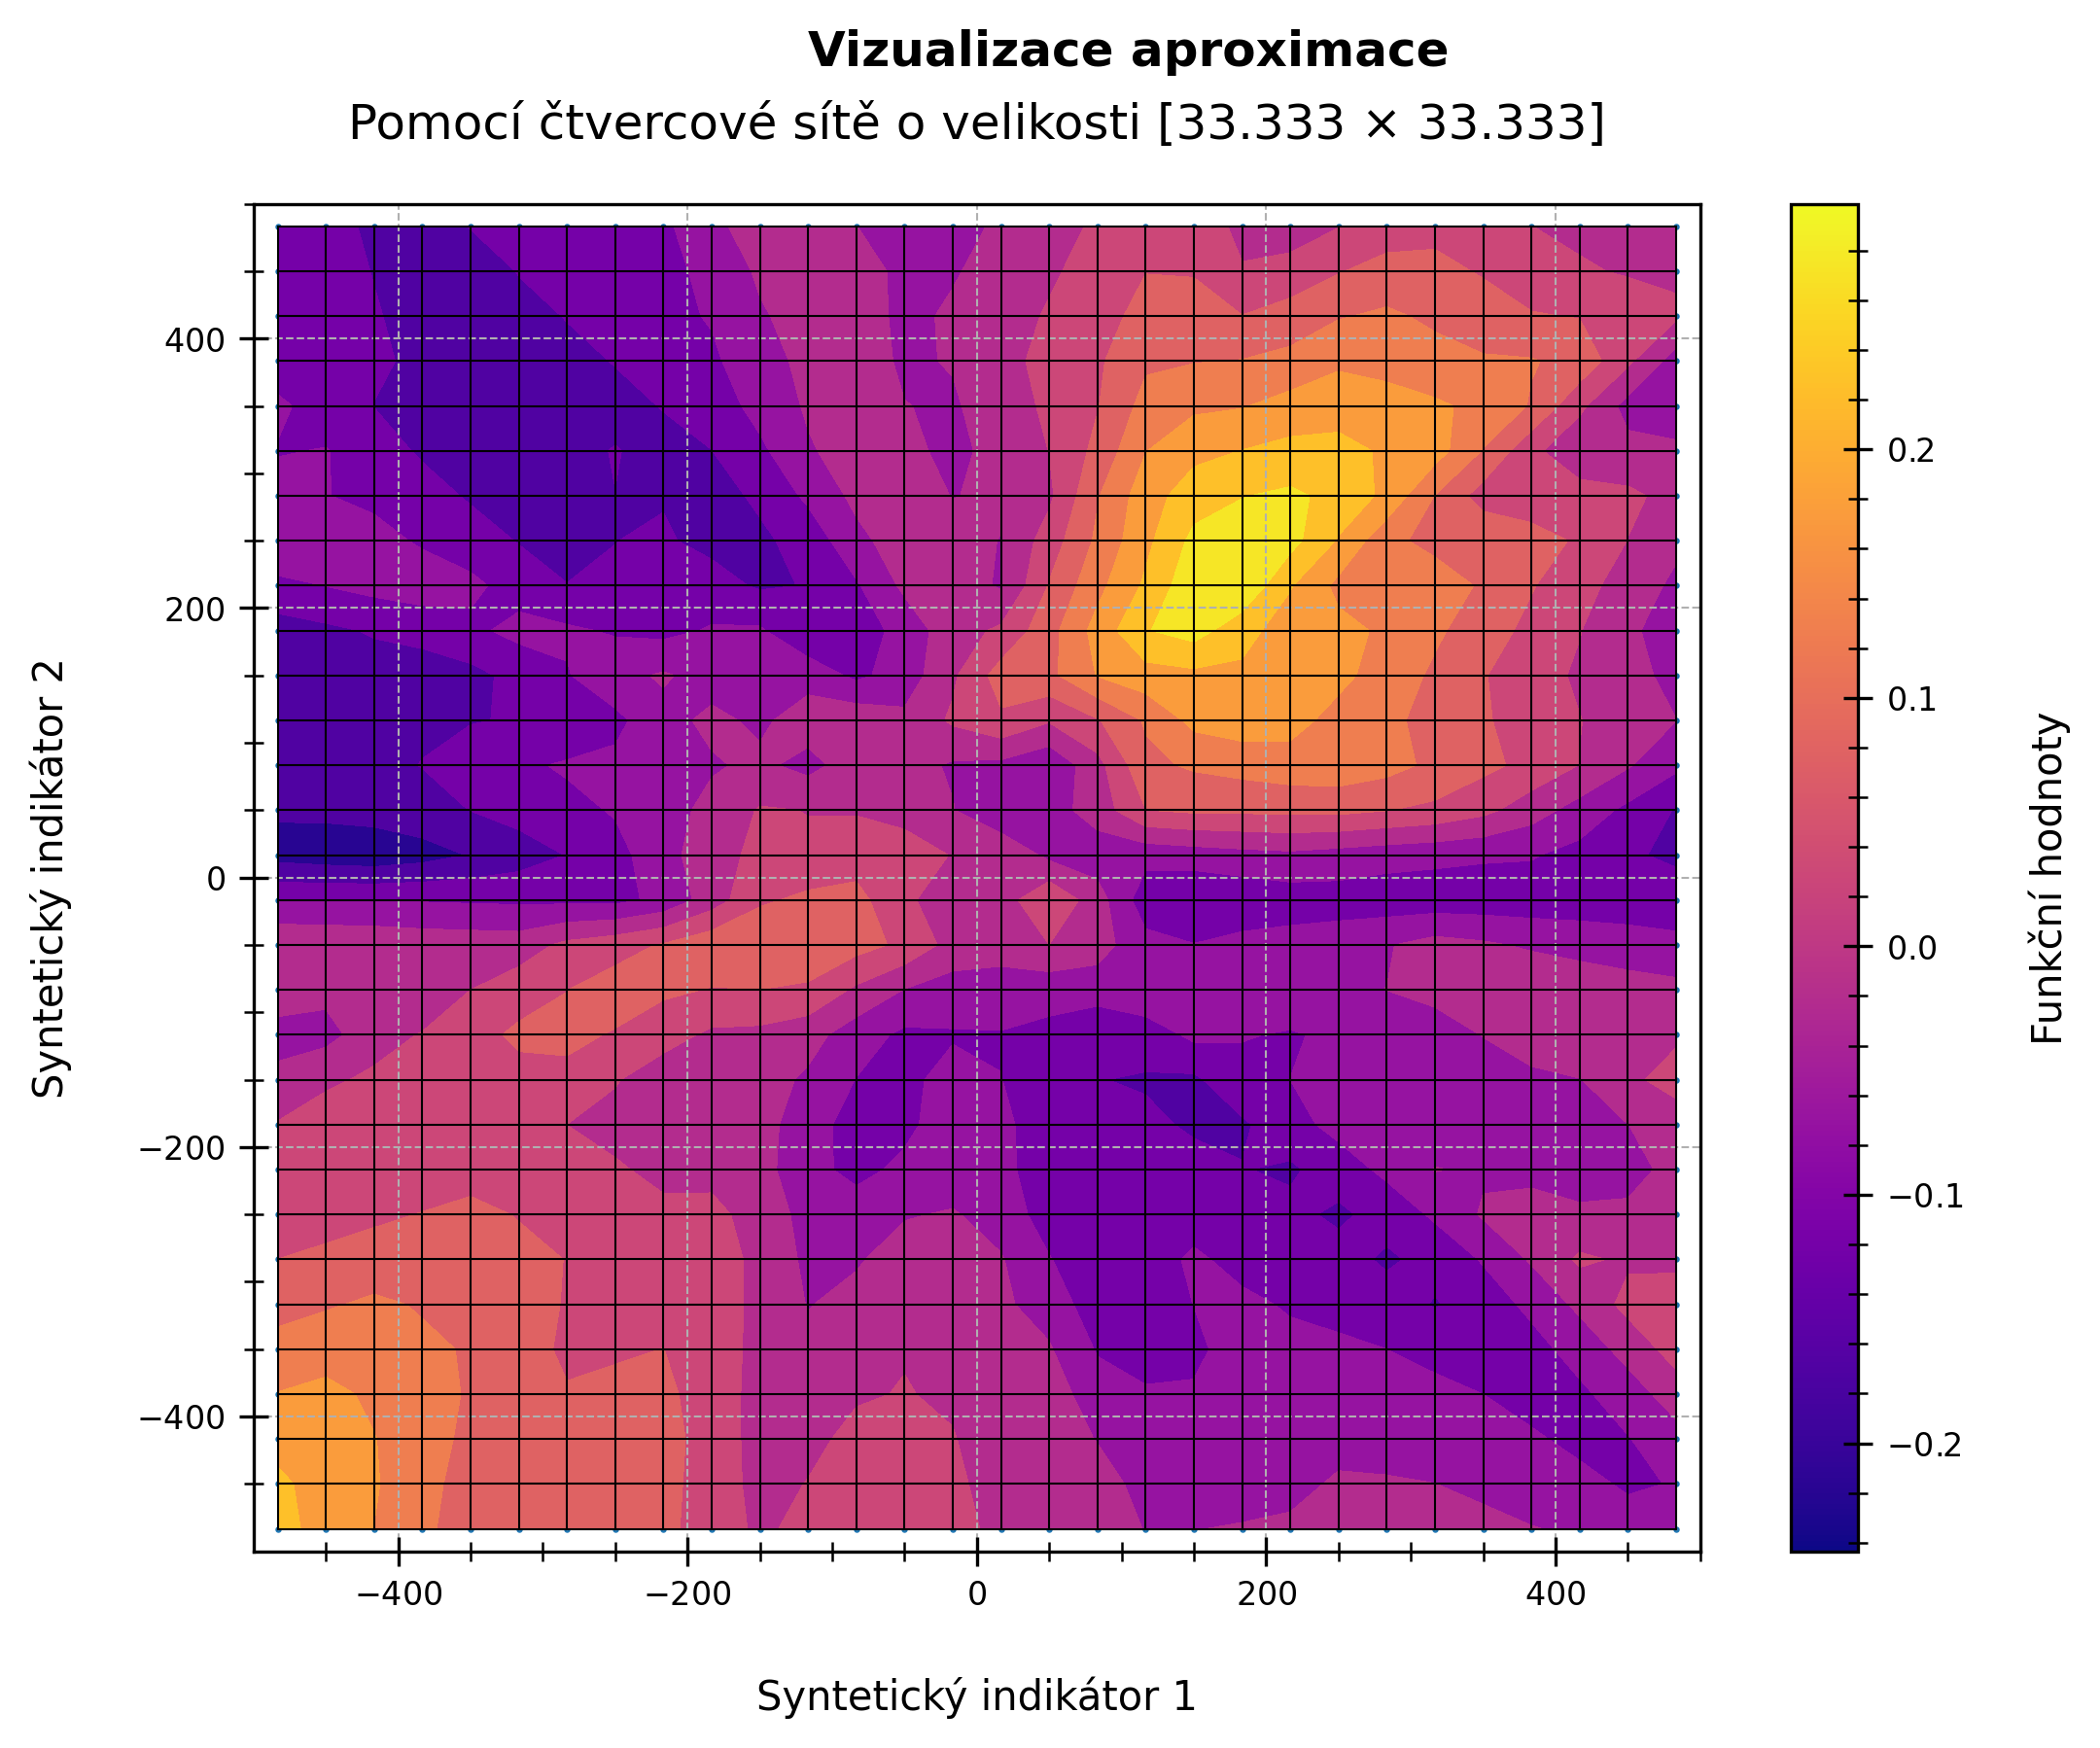

20:18:24	Execution time of [Pomocí čtvercové sítě o velikosti [33.333 × 33.333]]: 19.522010326385498 seconds


In [7]:
# 'Vizualizace mřížkou'
approximationVizualization(xlim=xlim,
                              ylim=ylim,
                              predict_func=nn.predict,
                              indicatorNames = ['Syntetický indikátor 1', 'Syntetický indikátor 2'],
                              samples=30,
                              saveFig_path=nn.plotsDir,
                              saveFig_title='vizualizace_mrizkou',
                              normMinMaxColor=normMinMaxColor_list
                            )

1/1 [==============================] - 0s 8ms/step


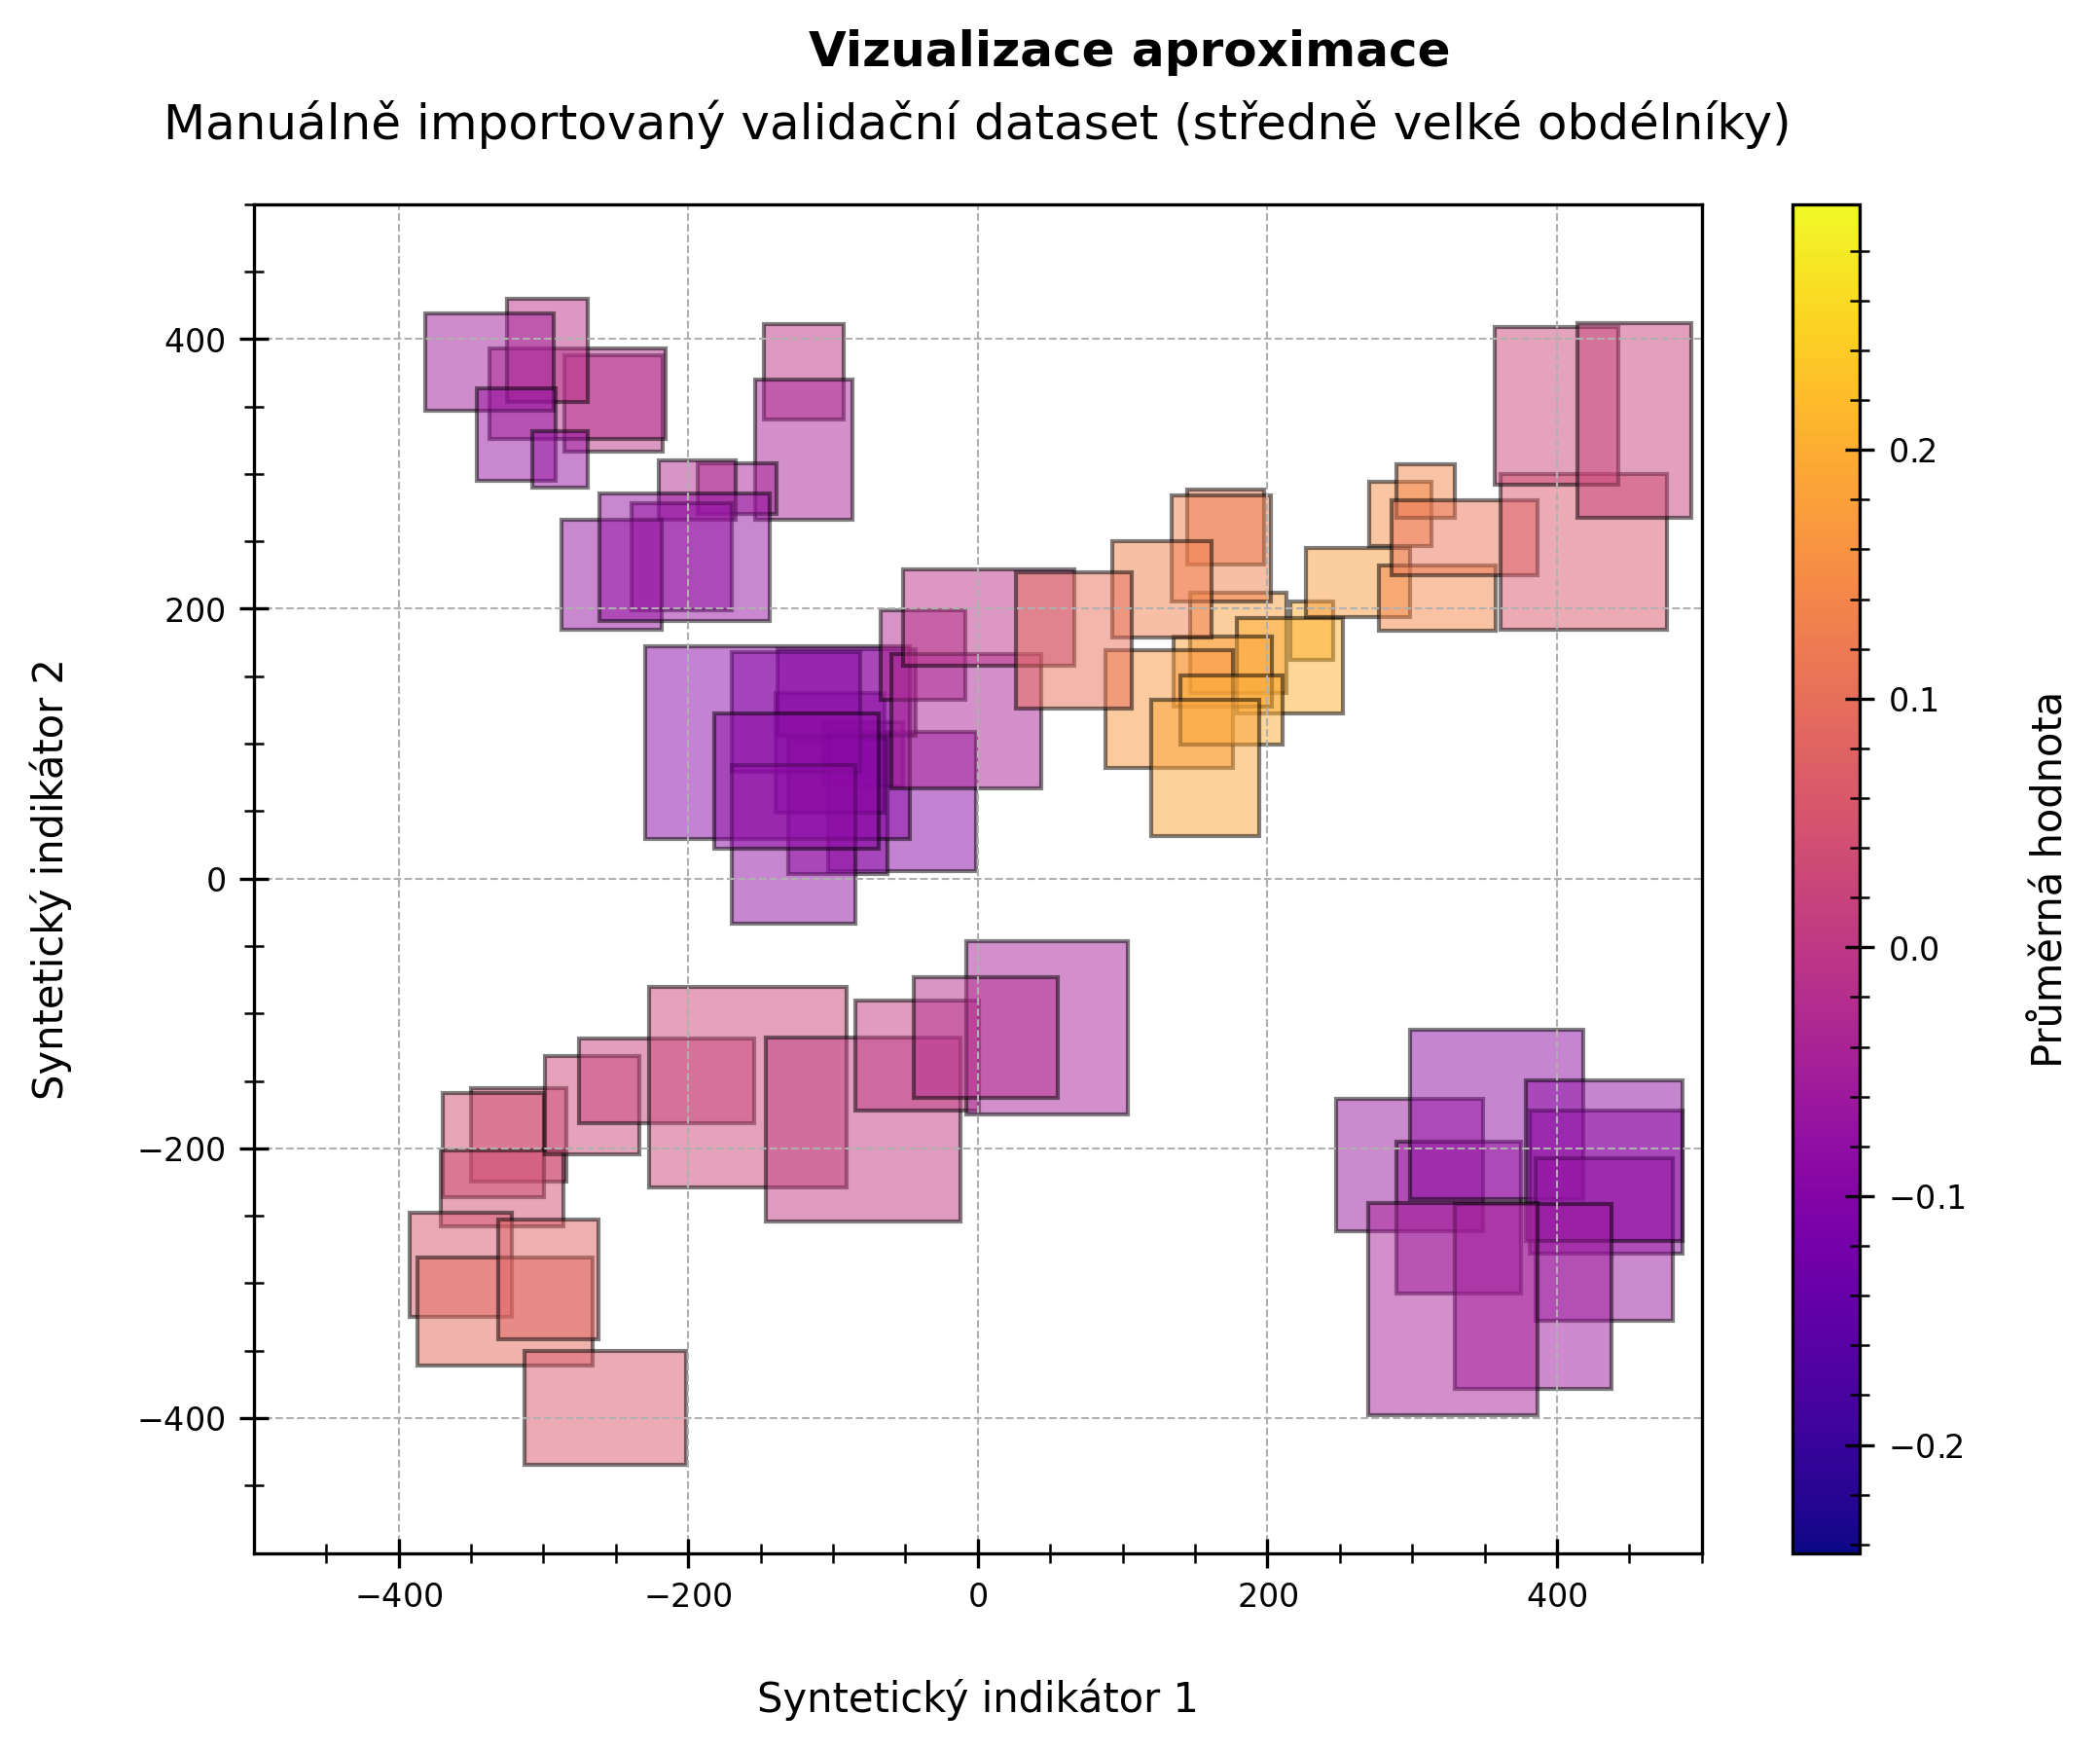

20:18:26	Execution time of [Manuálně importovaný validační dataset (středně velké obdélníky)]: 2.0086300373077393 seconds


In [8]:
# Visualization of model predictions evaluated on manually imported rectangles (Mid)
approximationVizualization(xlim=xlim,
                              ylim=ylim,
                              predict_func=nn.predict,
                              indicatorNames = ['Syntetický indikátor 1', 'Syntetický indikátor 2'],
                              samples='manual',
                              manualSamples={'file': f'{root_directory}3_Train/ValidationRectangles_Sampling/rectanglesValidation_mid.txt'},
                              saveFig_path=nn.plotsDir,
                              saveFig_title='manual_rectangles',
                              normMinMaxColor=normMinMaxColor_list,
                              Title='Manuálně importovaný validační dataset (středně velké obdélníky)'
                            )

1/1 [==============================] - 0s 8ms/step


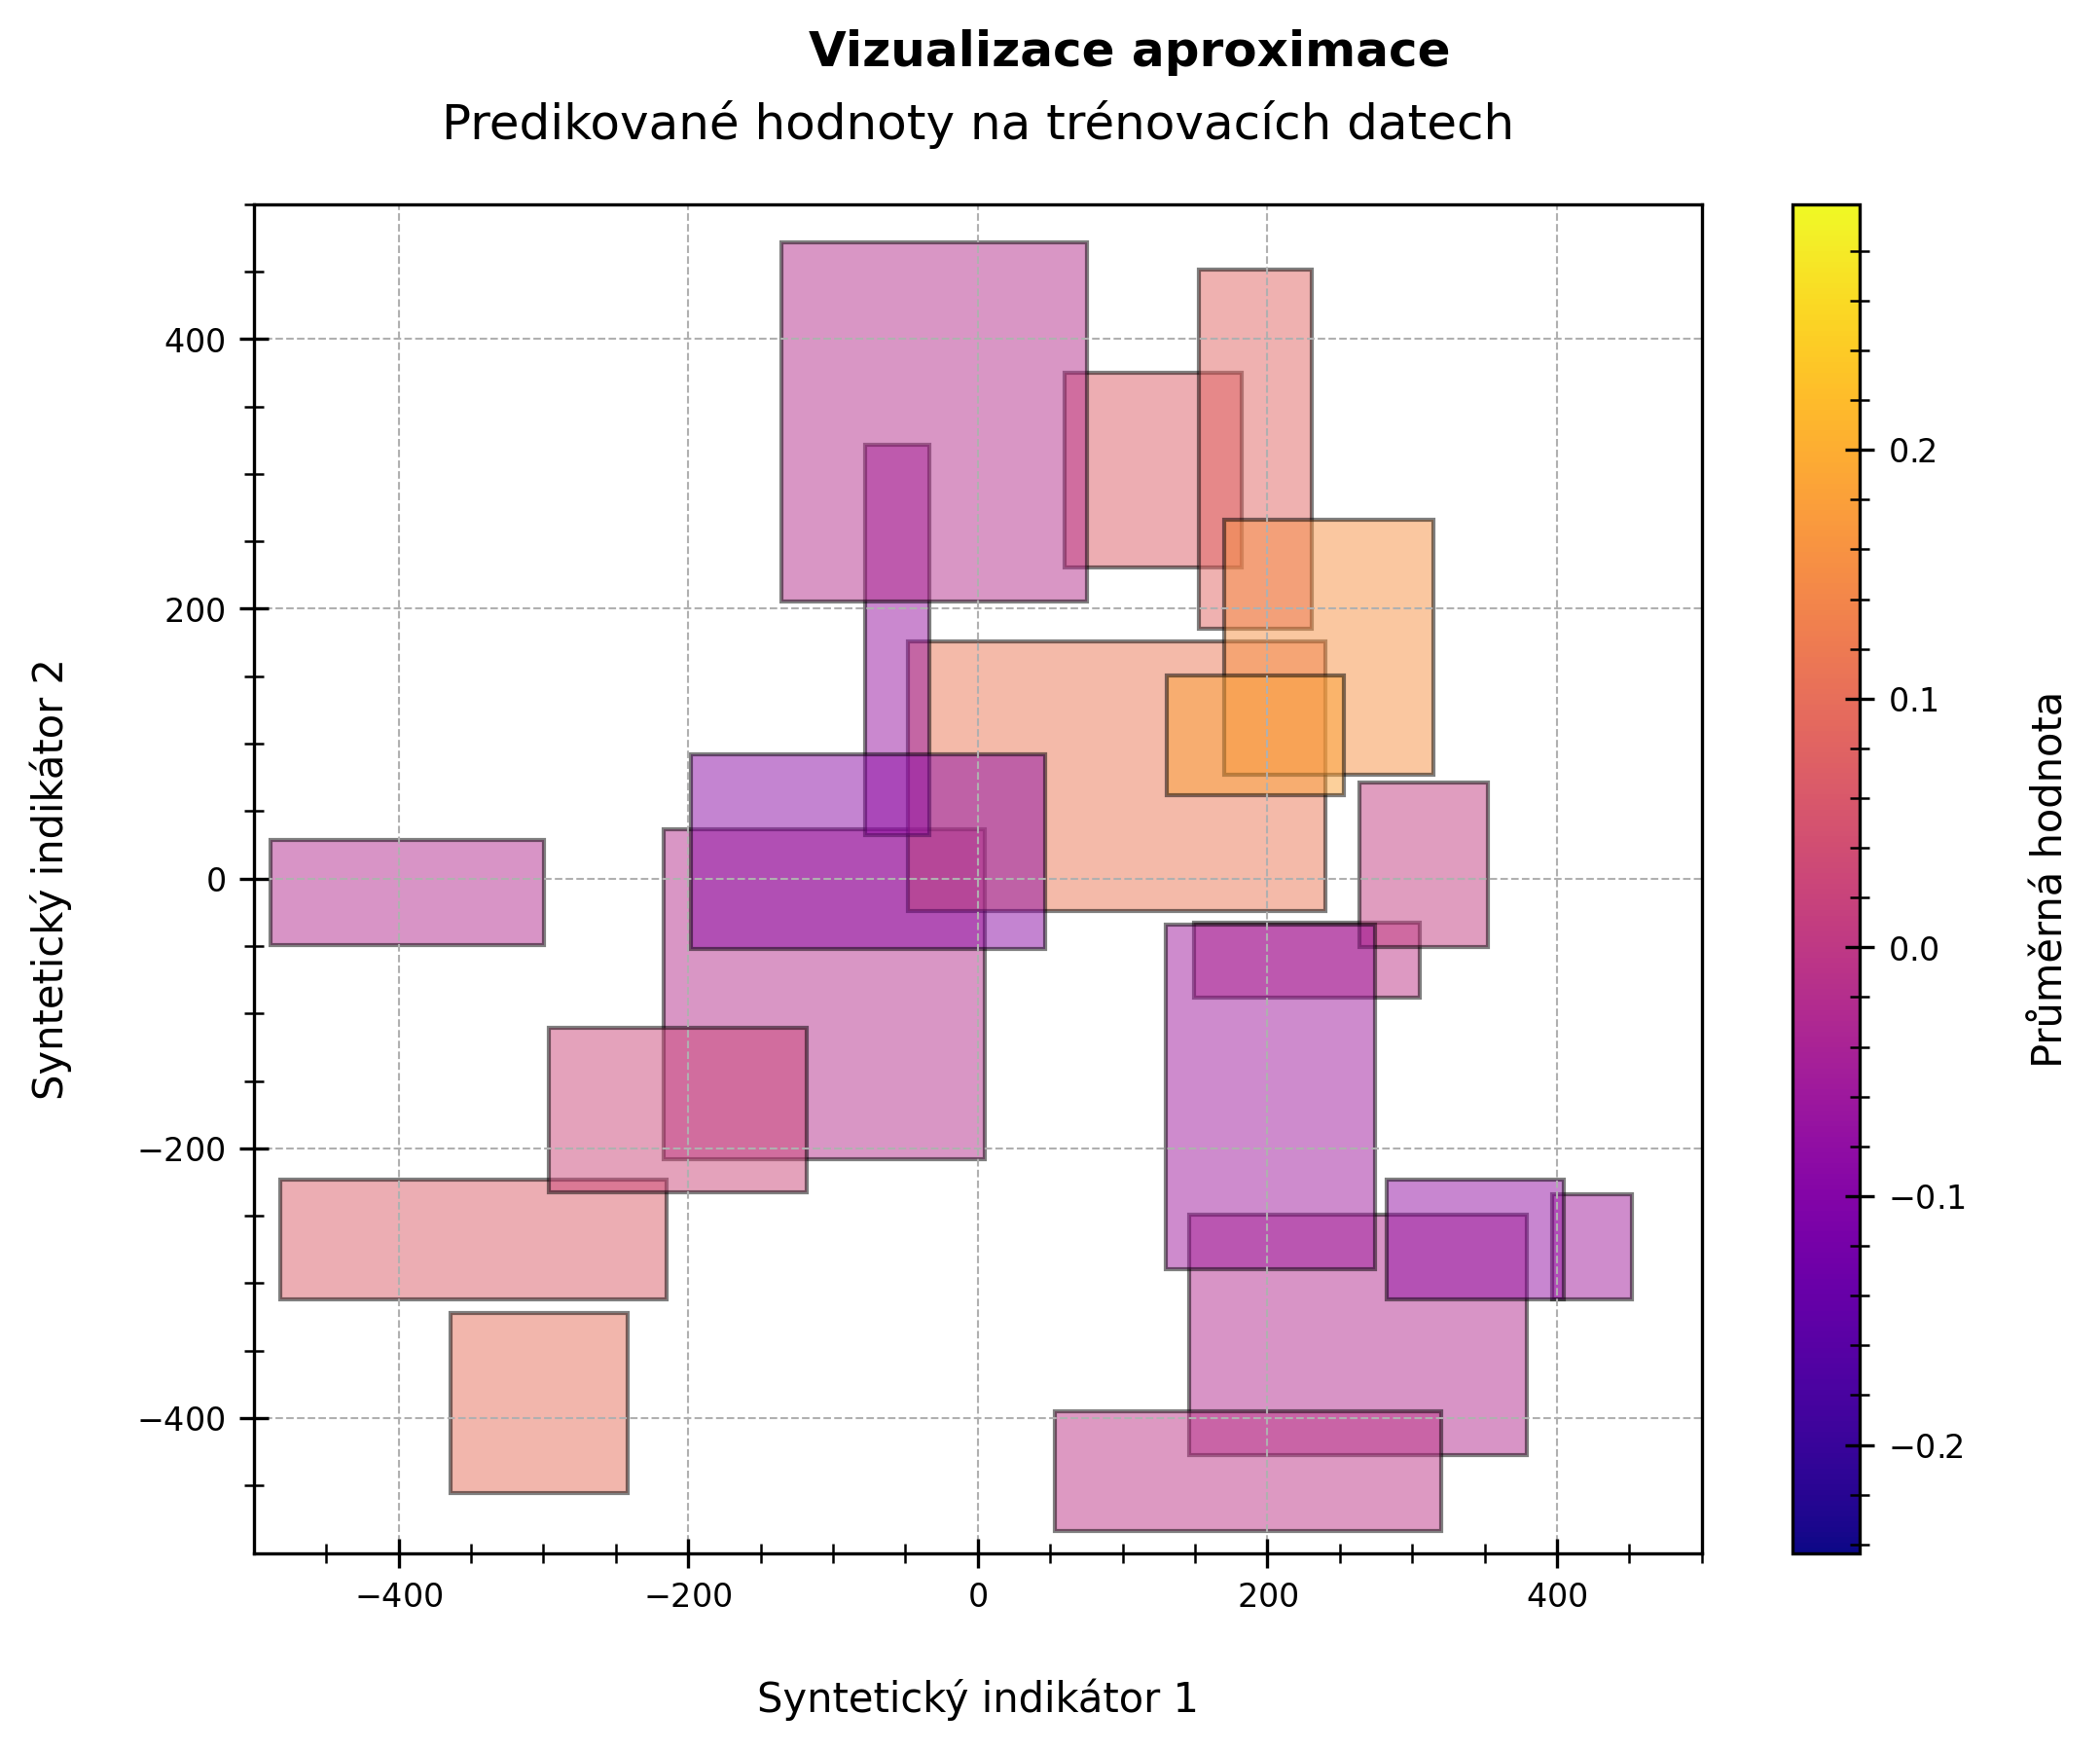

20:18:27	Execution time of [Predikované hodnoty na trénovacích datech]: 1.0366017818450928 seconds


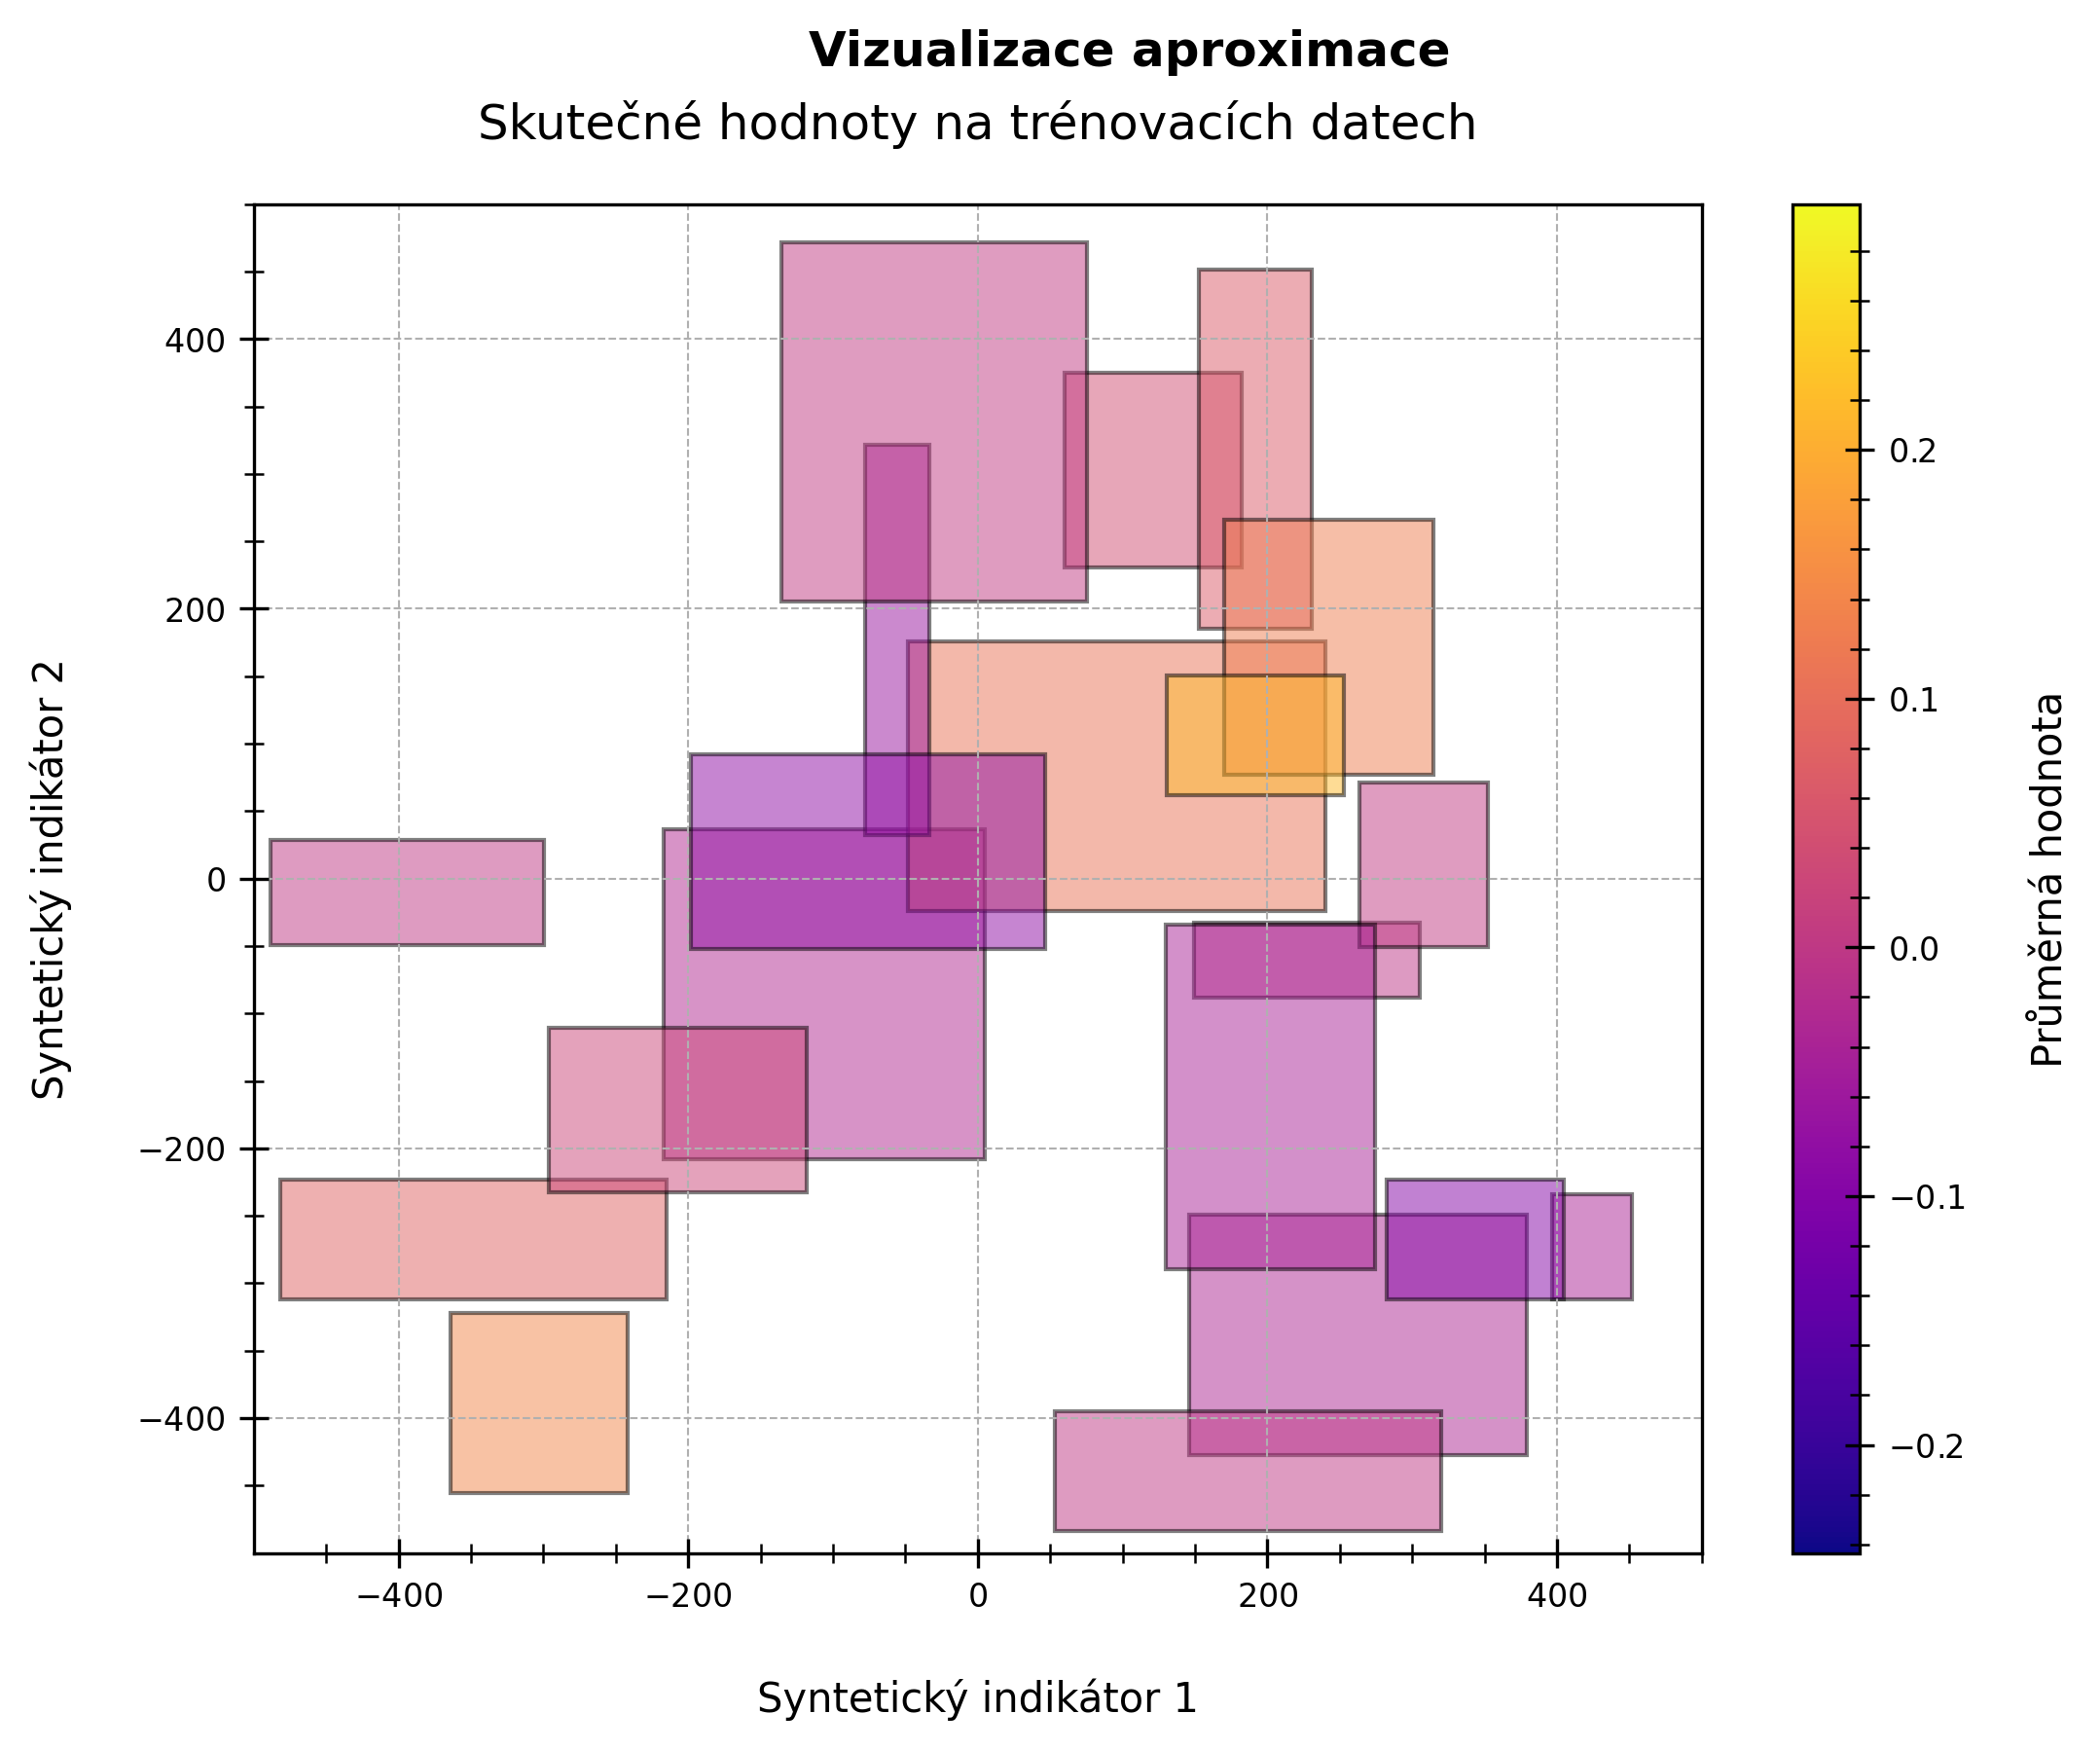

20:18:27	Execution time of [Skutečné hodnoty na trénovacích datech]: 0.7941169738769531 seconds


In [9]:
# Visualization of training data samples (in comparison with golden values)

X_train_noScale = nn.scalerObject_X.inverse_transform( nn.X_train ) # Training dataset without Standardization
Y_train_noScale = nn.scalerObject_Y.inverse_transform( nn.Y_train )

random_indices_train = np.random.choice(len(X_train_noScale), 20, replace=False) # Picking only subset

X_train_noScale = X_train_noScale[random_indices_train]
Y_train_noScale = Y_train_noScale[random_indices_train]

approximationVizualization(xlim=xlim,
                              ylim=ylim,
                              predict_func=nn.predict,
                              indicatorNames = ['Syntetický indikátor 1', 'Syntetický indikátor 2'],
                              samples='manual',
                              manualSamples={'dataset': [X_train_noScale, None]},
                              saveFig_path=nn.plotsDir,
                              saveFig_title='prediction_training_dataset',
                              normMinMaxColor=normMinMaxColor_list,
                              Title='Predikované hodnoty na trénovacích datech'
                            )

approximationVizualization(xlim=xlim,
                              ylim=ylim,
                              indicatorNames = ['Syntetický indikátor 1', 'Syntetický indikátor 2'],
                              samples='manual',
                              manualSamples={'dataset': [X_train_noScale, Y_train_noScale]},
                              saveFig_path=nn.plotsDir,
                              saveFig_title='golden_training_dataset',
                              normMinMaxColor=normMinMaxColor_list,
                              Title='Skutečné hodnoty na trénovacích datech'
                            )

1/1 [==============================] - 0s 8ms/step


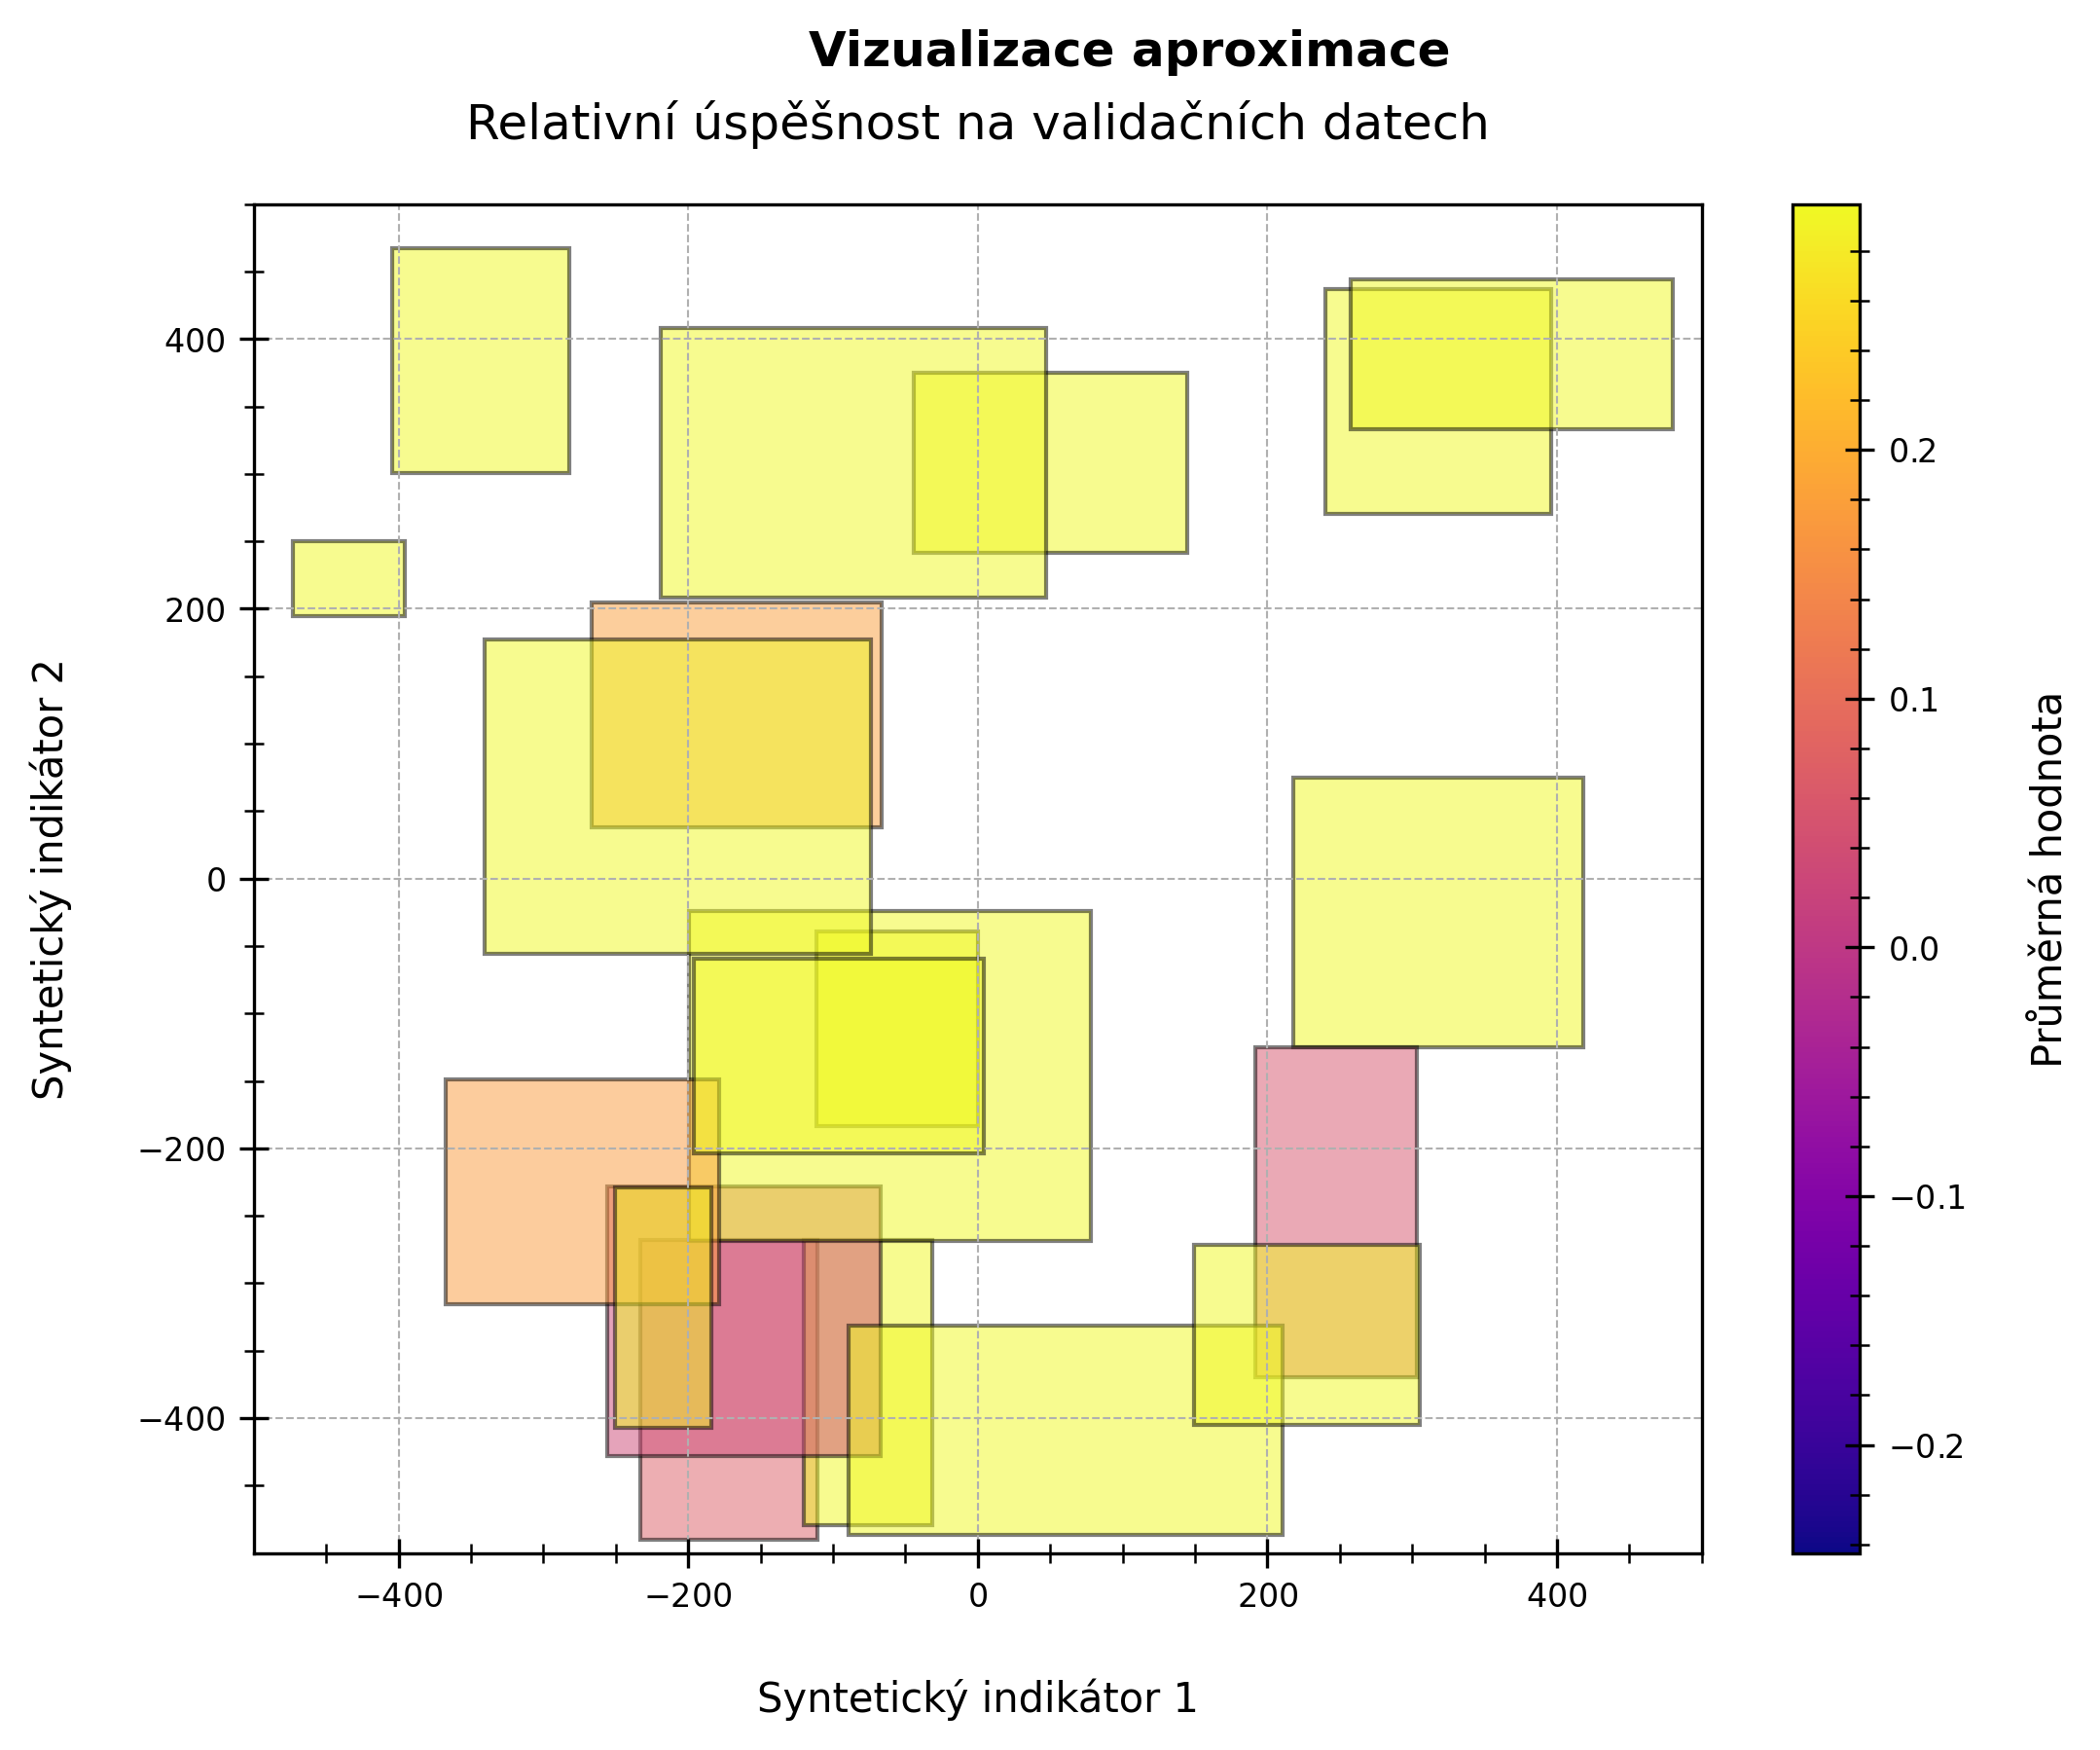

20:18:29	Execution time of [Relativní úspěšnost na validačních datech]: 1.0726869106292725 seconds


In [10]:
# Visualization of comparison predicted vs. golden values on validation dataset (relative)

X_test_noScale = nn.scalerObject_X.inverse_transform( nn.X_test )
Y_test_noScale = nn.scalerObject_Y.inverse_transform( nn.Y_test )

random_indices_test = np.random.choice(len(X_test_noScale), 20, replace=False) # Picking only subset

X_test_noScale = X_test_noScale[random_indices_test]
Y_test_noScale = Y_test_noScale[random_indices_test]

relativePredict_inst = nn.relativePredict(nn.predict, X_test_noScale, Y_test_noScale)

try:
  approximationVizualization(xlim=xlim,
                            ylim=ylim,
                            predict_func=relativePredict_inst.predict,
                            indicatorNames = ['Syntetický indikátor 1', 'Syntetický indikátor 2'],
                            samples='manual',
                            manualSamples={'dataset': [X_test_noScale, None]},
                            saveFig_path=nn.plotsDir,
                            saveFig_title='relativeAccuracy',
                            normMinMaxColor=normMinMaxColor_list,
                            Title='Relativní úspěšnost na validačních datech'
                          )
except Exception as e:
  Log.error(f'Error accured when plotting relative diff plot. Error: [{e}]')

# Loading saved model (showdown)

In [11]:
nn_loaded = train_neural.NeuralNetwork(inputDim=4, outputDim=1)
nn_loaded.loadExperiment(logdir = f'{root_directory}3_Train/Thesis/Intervals=(0.05, 0.25)_Samples=2000/train_neural.py-2024-05-25_105453-Em=1e-06,Ep=20,bs=50,du=[64, 64, 64],e=800,lr=0.01,lrf=0.0001,s=standardscaler,ts=0.3')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/vojtechremis/Desktop/bachelorproject/3_Train/Thesis/Intervals=(0.05, 0.25)_Samples=2000/train_neural.py-2024-05-25_105453-Em=1e-06,Ep=20,bs=50,du=[64, 64, 64],e=800,lr=0.01,lrf=0.0001,s=standardscaler,ts=0.3/Datasets/Loss_ValTrain.npy'